<a href="https://colab.research.google.com/github/12Nepo/regresion_lineal/blob/main/California_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df= pd.read_excel("california.xlsx")
df

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,20200000000000,1169.0,1.0,1.0,37.770280,-122.433170,3,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202,t,2023-06-03,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,20200000000000,8904.0,2.0,2.0,37.744740,-122.420890,4,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235,t,2023-06-03,2009-03-05 00:00:00,2017-06-08 00:00:00,license,f
2,2,8142.0,20200000000000,21994.0,13.0,14.0,37.765550,-122.452130,1,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56,t,2023-06-03,2014-08-09 00:00:00,27/10/2022,license,f
3,3,8339.0,20200000000000,24215.0,2.0,6.0,37.775640,-122.436420,4,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575,t,2023-06-03,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,20200000000000,7149.0,2.0,2.0,37.760300,-122.421970,3,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110,t,2023-06-03,2009-01-08 00:00:00,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6931,27790615.3,20200000000000,87507815.4,9.0,9.0,37.791994,-122.410000,2,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",164,t,2023-06-03,sin informacion,sin informacion,147904,t
6932,6932,27790615.3,20200000000000,87507815.4,1.0,1.0,37.763060,-122.432023,2,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",228,t,2023-06-03,2023-03-03 00:00:00,2023-03-03 00:00:00,2023-001477STR,f
6933,6933,27790615.3,20200000000000,87507815.4,1.0,1.0,37.777633,-122.416478,1,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer \u2013 In unit"", ""Mountain ...",104,t,2023-06-03,sin informacion,sin informacion,license,f
6934,6934,27790615.3,20200000000000,87507815.4,3.0,4.0,37.738325,-122.396603,2,1.0,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",65,t,2023-06-03,sin informacion,sin informacion,2022-012562STR,f


In [27]:
DFF = df[df["room_type"].isin(["Private room"])]

In [28]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

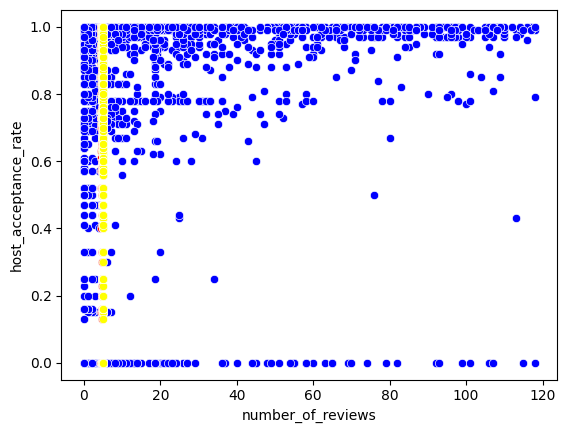

In [29]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00301819, 0.10916193, 0.13625379]),
 'rank_': 3,
 'singular_': array([1293.365803  ,    6.59385849,    2.48440532]),
 'intercept_': -0.48630939071907586}

**Modelo matemático: y= 0.0038051 , 0.06338939, 0.15069956 + -0.3375766340143591**

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04837144720705977

In [36]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([0.72704085, 0.7846058 , 0.92495793, ..., 0.70531142, 0.70531142,
       0.70531142])

In [37]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,id,scrape_id,Predicciones,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,2,8142.0,20200000000000,0.727041,21994.0,13.0,14.0,37.765550,-122.452130,1,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56,t,2023-06-03,2014-08-09 00:00:00,27/10/2022,license,f
4,4,8739.0,20200000000000,0.784606,7149.0,2.0,2.0,37.760300,-122.421970,3,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110,t,2023-06-03,2009-01-08 00:00:00,25/02/2023,STR-0000028,f
6,6,490931.0,20200000000000,0.924958,1269188.0,1.0,3.0,37.747660,-122.420410,2,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100,t,2023-06-03,22/04/2014,26/11/2022,license,f
7,7,10537.0,20200000000000,0.798115,36752.0,2.0,3.0,37.717500,-122.396980,2,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95,t,2023-06-03,21/02/2010,28/01/2023,2022-011003STR,f
11,11,144978.0,20200000000000,0.759801,216682.0,9.0,9.0,37.792330,-122.424310,1,...,Private room,sin informacion,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55,t,2023-06-03,2011-10-07 00:00:00,28/02/2023,license,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,6927,27790615.3,20200000000000,0.743787,87507815.4,32.0,38.0,37.788619,-122.422556,2,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",80,t,2023-06-03,13/02/2023,13/02/2023,Exempt,f
6929,6929,27790615.3,20200000000000,0.705311,226555948.0,5.3,7.7,37.725231,-122.404776,2,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",40,t,2023-06-03,sin informacion,sin informacion,license,f
6930,6930,27790615.3,20200000000000,0.705311,286802480.0,6.0,10.0,37.753771,-122.399004,1,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",56,t,2023-06-03,sin informacion,sin informacion,license,t
6933,6933,27790615.3,20200000000000,0.705311,87507815.4,1.0,1.0,37.777633,-122.416478,1,...,Private room,1 shared bath,"[""TV"", ""Free dryer \u2013 In unit"", ""Mountain ...",104,t,2023-06-03,sin informacion,sin informacion,license,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

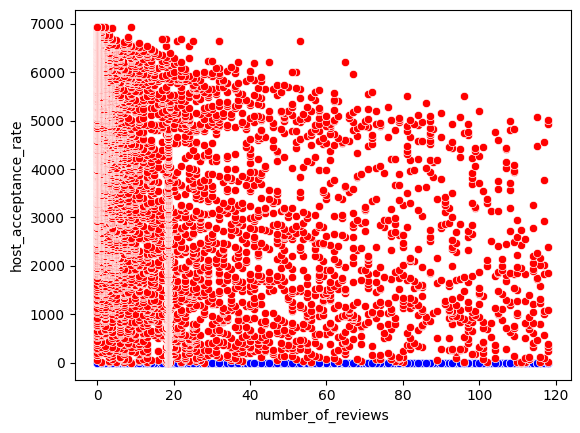

In [38]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [39]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04837144720705977

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21993509771534822

#**Hotel Room**

In [41]:
df= pd.read_excel("california.xlsx")
df

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,20200000000000,1169.0,1.0,1.0,37.770280,-122.433170,3,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202,t,2023-06-03,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,20200000000000,8904.0,2.0,2.0,37.744740,-122.420890,4,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235,t,2023-06-03,2009-03-05 00:00:00,2017-06-08 00:00:00,license,f
2,2,8142.0,20200000000000,21994.0,13.0,14.0,37.765550,-122.452130,1,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56,t,2023-06-03,2014-08-09 00:00:00,27/10/2022,license,f
3,3,8339.0,20200000000000,24215.0,2.0,6.0,37.775640,-122.436420,4,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575,t,2023-06-03,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,20200000000000,7149.0,2.0,2.0,37.760300,-122.421970,3,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110,t,2023-06-03,2009-01-08 00:00:00,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6931,27790615.3,20200000000000,87507815.4,9.0,9.0,37.791994,-122.410000,2,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",164,t,2023-06-03,sin informacion,sin informacion,147904,t
6932,6932,27790615.3,20200000000000,87507815.4,1.0,1.0,37.763060,-122.432023,2,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",228,t,2023-06-03,2023-03-03 00:00:00,2023-03-03 00:00:00,2023-001477STR,f
6933,6933,27790615.3,20200000000000,87507815.4,1.0,1.0,37.777633,-122.416478,1,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer \u2013 In unit"", ""Mountain ...",104,t,2023-06-03,sin informacion,sin informacion,license,f
6934,6934,27790615.3,20200000000000,87507815.4,3.0,4.0,37.738325,-122.396603,2,1.0,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",65,t,2023-06-03,sin informacion,sin informacion,2022-012562STR,f


In [42]:
DFF = df[df["room_type"].isin(["Hotel room"])]

In [43]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

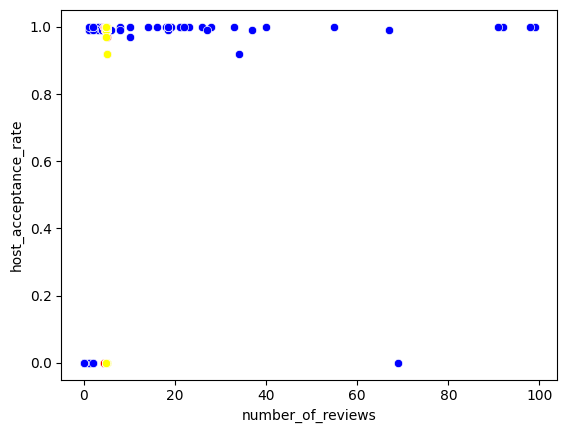

In [44]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [45]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [46]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [47]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [48]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.003438  ,  0.34856624, -0.88460726]),
 'rank_': 3,
 'singular_': array([191.20408093,   1.25665515,   0.35263669]),
 'intercept_': 3.4200674061773784}

**Modelo matemático: y= 0.00276691,  0.01500972, -0.01078818 + 0.8145322685013078**

In [50]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08018931415501529

In [51]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([0.8197824 , 0.73855683, 0.88329244, 0.72638085, 0.82097037,
       0.63514942, 0.90692032, 0.86566435, 0.72981885, 0.74717734,
       0.72614253, 0.88973033, 0.80957649, 0.84207501, 0.85878835,
       0.9127034 , 0.8326728 , 0.57245517, 0.75860977, 0.74330029,
       0.79690439, 0.75860977, 0.76049028, 0.72361015, 0.89674932,
       0.75493345, 0.74330029, 0.75361428, 0.83176101, 1.02729792,
       0.74673828, 1.12206603, 1.11101156, 0.9414433 , 0.82378874,
       0.8077145 , 0.82097037, 0.89088436, 0.86270299, 1.018849  ,
       0.85706935, 0.85706935, 0.93890516, 1.02963964, 0.74552816,
       0.74673828, 0.74673828, 0.74330029, 0.74673828, 0.75860977,
       0.75860977, 0.82784637])

In [52]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,id,scrape_id,Predicciones,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,711,4631873.0,20200000000000,0.819782,20850212.0,16.0,17.0,37.799200,-122.423580,2,...,Hotel room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",98,t,2023-06-03,22/11/2014,19/02/2023,FY 2017-18,t
787,787,6169292.0,20200000000000,0.738557,20850212.0,16.0,17.0,37.796960,-122.425390,4,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Self check-i...",129,t,2023-06-03,25/05/2015,2022-11-12 00:00:00,FY 2017-18,t
938,938,6883183.0,20200000000000,0.883292,23593310.0,5.0,10.0,37.787290,-122.409280,4,...,Hotel room,1 private bath,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",250,t,2023-06-03,2015-05-09 00:00:00,2021-01-08 00:00:00,License not needed per OSTR,f
1704,1704,16001051.0,20200000000000,0.726381,103884979.0,14.0,15.0,37.777220,-122.415600,1,...,Hotel room,4 shared baths,"[""Paid parking garage off premises"", ""Security...",91,t,2023-06-03,2017-10-02 00:00:00,20/02/2023,Exempt,f
2229,2229,23271377.0,20200000000000,0.820970,173206762.0,5.3,7.7,37.786690,-122.408820,2,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119,t,2023-06-03,22/05/2019,2022-04-09 00:00:00,1083521,t
2230,2230,23271459.0,20200000000000,0.635149,173206762.0,5.3,7.7,37.787450,-122.407140,2,...,Hotel room,1 private bath,"[""Paid parking garage off premises"", ""Security...",9999,t,2023-06-03,2019-10-05 00:00:00,16/02/2020,1083521,t
2246,2246,23551086.0,20200000000000,0.906920,173206762.0,5.3,7.7,37.785960,-122.408560,2,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119,t,2023-06-03,15/03/2018,13/11/2022,1083521,t
2247,2247,23551138.0,20200000000000,0.865664,173206762.0,5.3,7.7,37.785940,-122.407040,2,...,Hotel room,1 private bath,"[""Security cameras on property"", ""Shampoo"", ""T...",119,t,2023-06-03,15/04/2018,15/09/2022,1083521,t
2248,2248,23551287.0,20200000000000,0.729819,173206762.0,5.3,7.7,37.787520,-122.407120,2,...,Hotel room,1 private bath,"[""Paid parking garage off premises"", ""Security...",9999,t,2023-06-03,16/03/2018,29/02/2020,1083521,t
2252,2252,23551835.0,20200000000000,0.747177,173206762.0,5.3,7.7,37.787970,-122.409070,2,...,Hotel room,1 private bath,"[""Paid parking garage off premises"", ""Security...",9999,t,2023-06-03,24/03/2018,25/02/2020,1083521,t


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

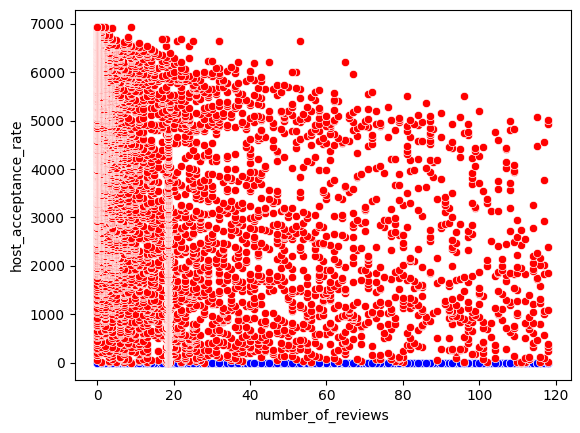

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08018931415501529

In [55]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.28317717802643505